In [1]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를위해 mapplotlib,seaborn 를 불러온다
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글설정 & 마이너스표시
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)

In [7]:
df = pd.read_csv('1_data.csv',encoding='cp949')

C:\Users\kh502\AppData\Local\Temp\ipykernel_15416\2734621014.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1_data.csv',encoding='cp949')


In [9]:
df.shape

(57449, 18)

In [10]:
## 모든 열 보이게하기 설정
pd.set_option('display.max_columns', None)
## 모든 행 보이게하기 설정
# pd.set_option('display.max_rows', None)

In [11]:
df.head()

,UserID,UserID_1,PMNTN_SN,MNTN_CODE,MNTN_NM,PMNTN_NM,PMNTN_MAIN,PMNTN_LT,PMNTN_DFFL,PMNTN_UPPL,PMNTN_GODN,PMNTN_MTRQ,PMNTN_CNRL,PMNTN_CLS_,PMNTN_RISK,PMNTN_RECO,DATA_STDR_,MNTN_ID
0,0,0,32553,428203804,소똥령,진부리구간,NaN,2.53,쉬움,45,31,NaN,NaN,NaN,NaN,NaN,2016-12-31,428201601.0
1,0,0,16474,428203704,머네골1구간,장신리구간,NaN,2.78,쉬움,49,34,NaN,NaN,Y,NaN,NaN,2016-12-31,428201301.0
2,0,0,1955,428200301,건봉산,광산리구간,NaN,6.18,쉬움,109,76,NaN,NaN,Y,NaN,NaN,2016-12-31,428200301.0
3,0,0,47554,428204404,진부령,진부리구간,NaN,3.31,쉬움,58,41,NaN,NaN,NaN,NaN,NaN,2016-12-31,428204404.0
4,0,0,36422,428203904,안흘리길,장신리구간,NaN,10.31,쉬움,221,155,NaN,NaN,NaN,NaN,NaN,2016-12-31,428201901.0


In [85]:
# 필요없는 컬럼 삭제
df.shape
df.drop(['UserID','UserID_1','DATA_STDR_','MNTN_ID'],axis=1,inplace=True)
df.shape         

(34293, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34293 entries, 0 to 57448
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PMNTN_SN    34293 non-null  int64  
 1   MNTN_CODE   34293 non-null  int64  
 2   MNTN_NM     34293 non-null  object 
 3   PMNTN_NM    34293 non-null  object 
 4   PMNTN_MAIN  34293 non-null  object 
 5   PMNTN_LT    34293 non-null  float64
 6   PMNTN_DFFL  34251 non-null  object 
 7   PMNTN_UPPL  34293 non-null  int64  
 8   PMNTN_GODN  34293 non-null  int64  
 9   PMNTN_MTRQ  34293 non-null  object 
 10  PMNTN_CNRL  34293 non-null  object 
 11  PMNTN_CLS_  34293 non-null  object 
 12  PMNTN_RISK  34293 non-null  object 
 13  PMNTN_RECO  34293 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.9+ MB


In [87]:
df.describe()

,PMNTN_SN,MNTN_CODE,PMNTN_LT,PMNTN_UPPL,PMNTN_GODN
count,34293.000000,3.429300e+04,34293.000000,34293.000000,34293.000000
mean,28937.169714,3.734180e+08,0.735136,15.371213,10.687954
std,16802.939382,1.182180e+08,2.220059,47.183445,33.052680
min,1.000000,1.111001e+08,0.000000,0.000000,0.000000
25%,14065.000000,2.820014e+08,0.090000,2.000000,1.000000
50%,30005.000000,4.281077e+08,0.260000,5.000000,3.000000
75%,43225.000000,4.617005e+08,0.770000,14.000000,10.000000
max,59021.000000,4.913030e+08,117.930000,2081.000000,1457.000000


In [88]:
df.describe(include='O')

,MNTN_NM,PMNTN_NM,PMNTN_MAIN,PMNTN_DFFL,PMNTN_MTRQ,PMNTN_CNRL,PMNTN_CLS_,PMNTN_RISK,PMNTN_RECO
count,34293,34293,34293,34251,34293,34293,34293,34293,34293
unique,2174,4889,647,6,109,2,2,192,3
top,황령산,홍은동구간,N,쉬움,N,N,N,N,M
freq,917,255,33363,33547,25497,34285,33846,31021,34054


In [94]:
df['PMNTN_DFFL'].value_counts()

PMNTN_DFFL
쉬움      33547
중간        686
어려리구       10
어려동구        6
어려봉-        1
어려재         1
Name: count, dtype: int64

In [90]:
df['PMNTN_RISK'].unique()

array(['N', '암석노출', '가파른 절벽을 끼고 있음, 부주의에 의한 추락위험이 있음', '늪', '하천/늪지대',
       '야간에등산할수 없음', '하산할때 방향을 잃어버리기 쉽고 매우 가파름', '비등산로 입산시 안전시설 및 나무 뿌리',
       '해안절벽', '가파른 암벽이 다수 노출', '경사지/암석노출',
       '바닥에 수분이 없고, 바닥이 굳어있으며, 자갈모래가 석여있어 미끄러질 위험이있다.', '나뭇가지가 너무 무성함',
       '관리를 전혀 하지 않아, 덩쿨 걸려 넘어질 위험이 많다.',
       '사람들도 다니지 않는 것 같고, 풀들이 많이 자라있어서 등산하기 어렵다.',
       '산을 오르는 각이 너무 높고, 미끄러질 위험이 있다.', '습기가 많아 미끄러질 위험이 많이있다',
       '암석노출/급경사구간', '관리 부족으로 인하여 풀들이 너무 많이자라 걸려 넘어질 위험이 있음',
       '덩쿨걸려넘어질위협이많음', '돌들이 많이있고, 각이 진곳이 있으니 조심히 올라가는 것이좋다.', '경사도가심함',
       '부분적으로 산책로 폭 협소하며 낭떠러지 있음', '근계 암석노출,경사구간', '미끄럼 주의', '미끄럼주의',
       '등산로의 형태가 없어 위험요소가 많음', '벌주의', '암석 및 미끄럼 주의', '정상부 바위 미끄럼/벌',
       '암반지대가많음', '산이 완만하여 큰위험요소 없음', '암반과 토사로 이루어진 구간이 많아 미끄러짐 주의 해야함',
       '정상아래 암반주의', '밤나무밭주위라 독충이나 독사에 주의', '표지판 설치', '맷돼지/뱀',
       '관리가 안되있는 곳에 넝쿨이 있어 걸릴 위험이있다.', '대부분 돌로 이루어져 있는 산이라 위험하다',
       '습진곳이므로 미끄러질 위험이 있어 조심하는게 좋다.', '각이 높이 진곳이고, 습기가 많아서 미끄러질 위험이 있다',
       '뱀이 많이 서식함', '급경사', '미끄러짐/낙석

In [91]:
pd.set_option('display.max_rows', 60)
df['PMNTN_MTRQ'].value_counts()

PMNTN_MTRQ
N            25497
토사            5488
흙길             892
토사/암반          498
마사토            155
             ...  
시멘트/전석/토사        1
화강암              1
흙                1
토사/목계단           1
토양,암석            1
Name: count, Length: 109, dtype: int64

In [92]:
# 결측치 확인
df.isnull().sum().sort_values(ascending=False)

PMNTN_DFFL    42
PMNTN_SN       0
MNTN_CODE      0
MNTN_NM        0
PMNTN_NM       0
PMNTN_MAIN     0
PMNTN_LT       0
PMNTN_UPPL     0
PMNTN_GODN     0
PMNTN_MTRQ     0
PMNTN_CNRL     0
PMNTN_CLS_     0
PMNTN_RISK     0
PMNTN_RECO     0
dtype: int64

<Axes: >

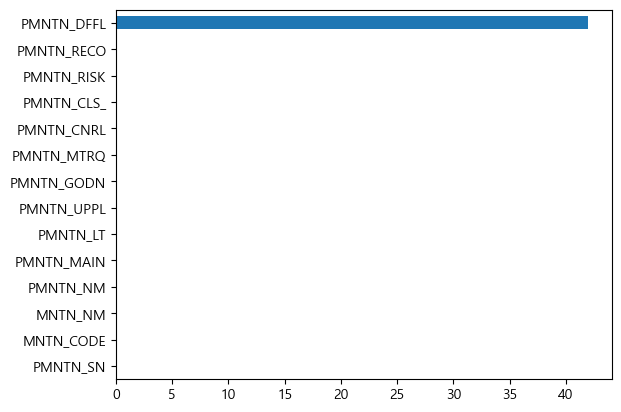

In [93]:
df.isnull().sum().sort_values(ascending=True).plot.barh()

<Axes: ylabel='PMNTN_MTRQ'>

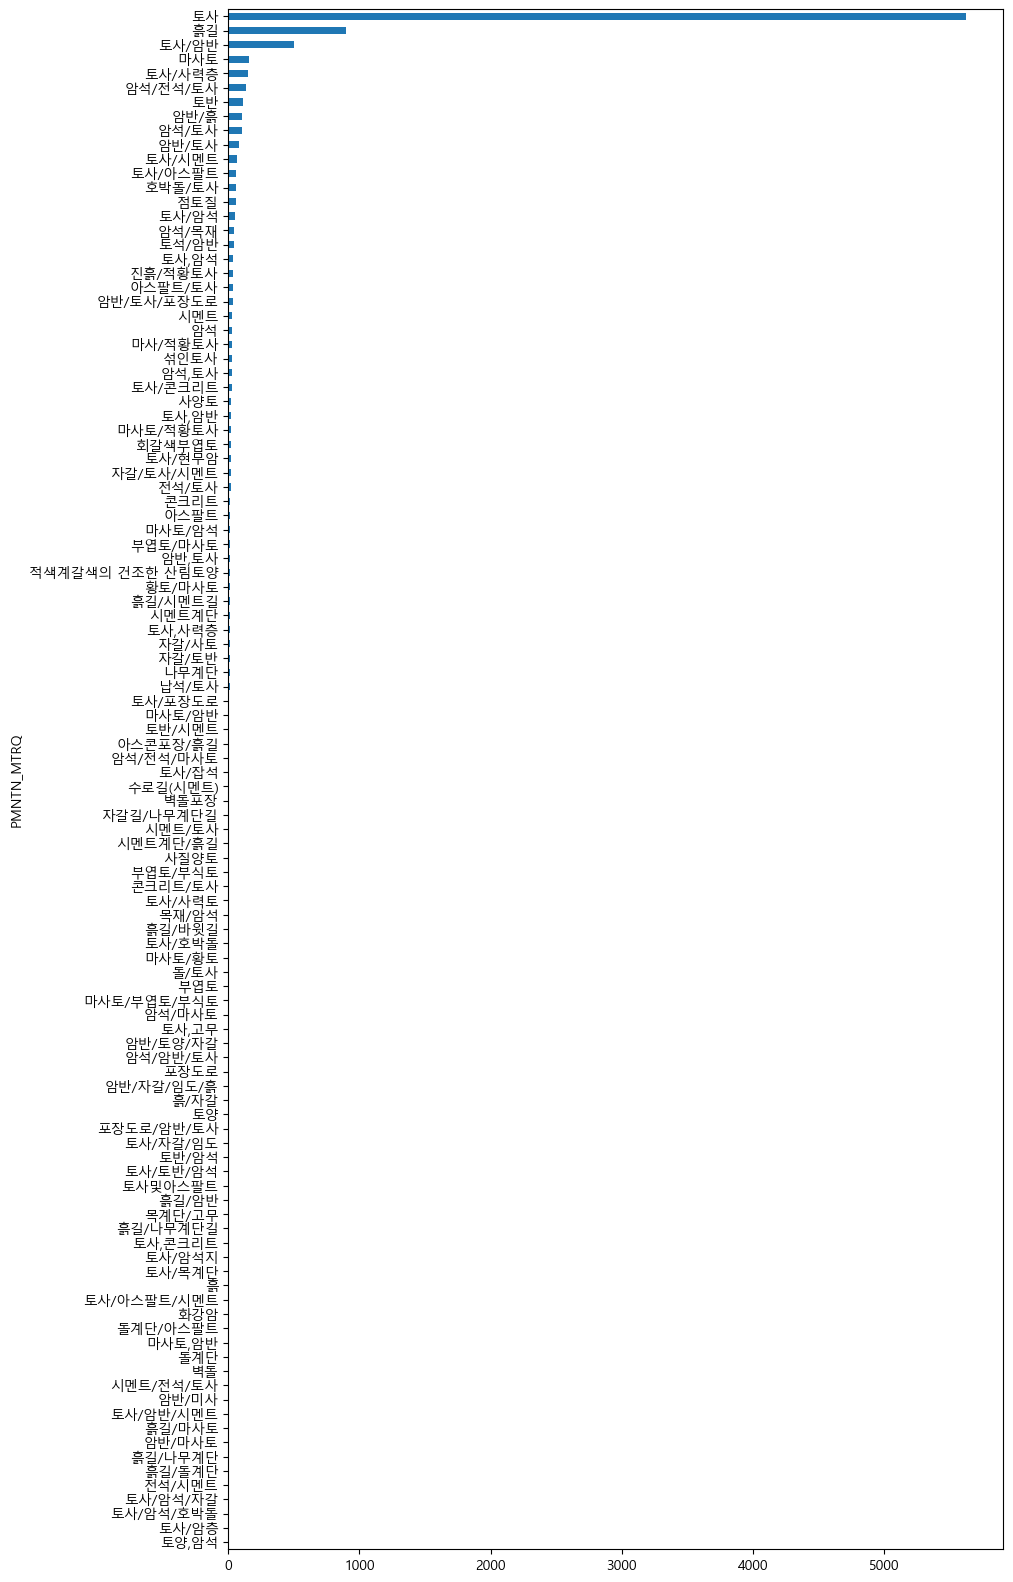

In [67]:
plt.figure(figsize=(10,20))
df['PMNTN_MTRQ'].value_counts().sort_values(ascending=True).plot.barh()

In [78]:
# 결측치를 다른 값으로 대체하기
# 등산로 통제 결측치 대체
df['PMNTN_CNRL'].fillna('N',inplace=True)
df['PMNTN_CNRL'].isnull().sum()
# 등산로 추천 결측치 대체
df['PMNTN_RECO'].fillna('M',inplace=True) # 중립
df['PMNTN_RECO'].isnull().sum()
# 폐쇄여부 격측치 대체
df['PMNTN_CLS_'].fillna('N',inplace=True) # 
df['PMNTN_CLS_'].isnull().sum()
# 위험요소 격측치 대체
df['PMNTN_RISK'].fillna('N',inplace=True) # 
df['PMNTN_RISK'].isnull().sum()
# 등산로 주요 지점 결측치 대체
df['PMNTN_MAIN'].fillna('N',inplace=True) # 
df['PMNTN_MAIN'].isnull().sum()
# 등산로 재질 결측치 대체
df['PMNTN_MTRQ'].fillna('N',inplace=True) # 
df['PMNTN_MTRQ'].isnull().sum()


0

In [79]:
df['PMNTN_NM'].isnull().sum()

0

In [95]:
# 등산로 이름 결측치 제거
print(df.shape)
df.dropna(subset=['PMNTN_NM'],inplace=True)
print(df.shape)

# 난위도 결측치 제거
print(df.shape)
df.dropna(subset=['PMNTN_DFFL'],inplace=True)
print(df.shape)

(34293, 14)
(34293, 14)
(34293, 14)
(34251, 14)


In [97]:
df.isnull().sum()

PMNTN_SN      0
MNTN_CODE     0
MNTN_NM       0
PMNTN_NM      0
PMNTN_MAIN    0
PMNTN_LT      0
PMNTN_DFFL    0
PMNTN_UPPL    0
PMNTN_GODN    0
PMNTN_MTRQ    0
PMNTN_CNRL    0
PMNTN_CLS_    0
PMNTN_RISK    0
PMNTN_RECO    0
dtype: int64

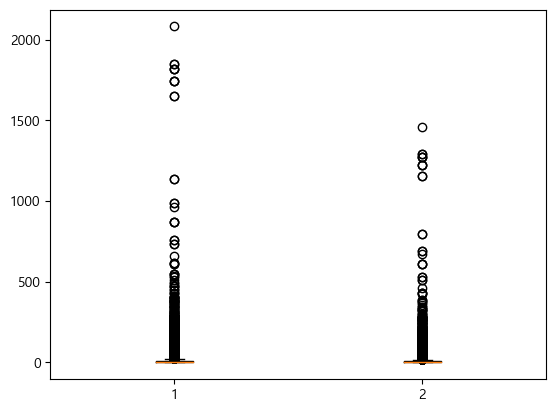

In [47]:
# 이상치
plt.boxplot(df[['PMNTN_UPPL','PMNTN_GODN']])
plt.show()

In [98]:
df

,PMNTN_SN,MNTN_CODE,MNTN_NM,PMNTN_NM,PMNTN_MAIN,PMNTN_LT,PMNTN_DFFL,PMNTN_UPPL,PMNTN_GODN,PMNTN_MTRQ,PMNTN_CNRL,PMNTN_CLS_,PMNTN_RISK,PMNTN_RECO
0,32553,428203804,소똥령,진부리구간,N,2.53,쉬움,45,31,N,N,N,N,M
1,16474,428203704,머네골1구간,장신리구간,N,2.78,쉬움,49,34,N,N,Y,N,M
2,1955,428200301,건봉산,광산리구간,N,6.18,쉬움,109,76,N,N,Y,N,M
3,47554,428204404,진부령,진부리구간,N,3.31,쉬움,58,41,N,N,N,N,M
4,36422,428203904,안흘리길,장신리구간,N,10.31,쉬움,221,155,N,N,N,N,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57442,3869,422300501,고성산,오분동구간,N,0.08,쉬움,1,1,N,N,N,N,M
57445,3872,422300501,고성산,오분동구간,N,0.21,쉬움,4,3,N,N,N,N,M
57446,974,422300104,갈야산,마달동구간,N,1.03,쉬움,18,13,N,N,N,N,M
57447,840,422300201,간대산,신기리구간,N,3.09,쉬움,55,38,N,N,N,N,M


In [121]:
# 수치형 컬럼가져오기
display(df.select_dtypes(include=[np.number]))

# 수치형 컬럼간 상관계수확인하기
display(df.select_dtypes(include=[np.number]).corr())

,PMNTN_SN,MNTN_CODE,PMNTN_LT,PMNTN_UPPL,PMNTN_GODN
0,32553,428203804,2.53,45,31
1,16474,428203704,2.78,49,34
2,1955,428200301,6.18,109,76
3,47554,428204404,3.31,58,41
4,36422,428203904,10.31,221,155
...,...,...,...,...,...
57442,3869,422300501,0.08,1,1
57445,3872,422300501,0.21,4,3
57446,974,422300104,1.03,18,13
57447,840,422300201,3.09,55,38


,PMNTN_SN,MNTN_CODE,PMNTN_LT,PMNTN_UPPL,PMNTN_GODN
PMNTN_SN,1.000000,-0.034955,-0.005470,-0.005504,-0.005706
MNTN_CODE,-0.034955,1.000000,0.143491,0.147371,0.148774
PMNTN_LT,-0.005470,0.143491,1.000000,0.951798,0.951864
PMNTN_UPPL,-0.005504,0.147371,0.951798,1.000000,0.999925
PMNTN_GODN,-0.005706,0.148774,0.951864,0.999925,1.000000


,PMNTN_SN,MNTN_CODE,PMNTN_LT,PMNTN_UPPL,PMNTN_GODN
PMNTN_SN,1.000000,-0.034955,-0.005470,-0.005504,-0.005706
MNTN_CODE,-0.034955,1.000000,0.143491,0.147371,0.148774
PMNTN_LT,-0.005470,0.143491,1.000000,0.951798,0.951864
PMNTN_UPPL,-0.005504,0.147371,0.951798,1.000000,0.999925
PMNTN_GODN,-0.005706,0.148774,0.951864,0.999925,1.000000


<Axes: >

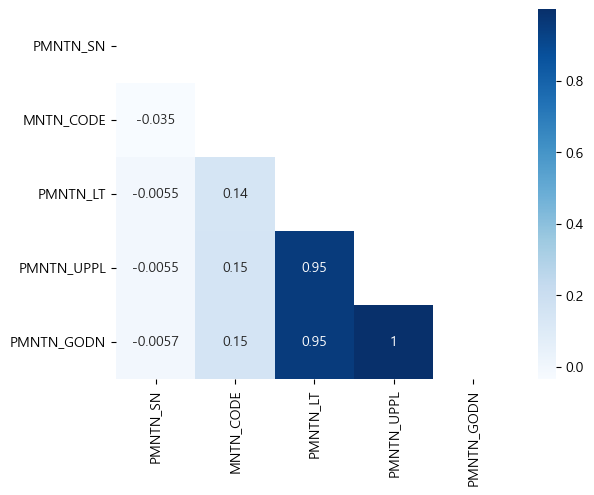

In [123]:
corr = df.select_dtypes(include=[np.number]).corr()
display(corr)
# 상관관계 매트릭스의 상단을 가리기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, cmap='Blues',mask=mask)

In [134]:
df[df['MNTN_NM']=='지리산'].sum()

PMNTN_SN        0
MNTN_CODE       0
MNTN_NM         0
PMNTN_NM        0
PMNTN_MAIN      0
PMNTN_LT      0.0
PMNTN_DFFL      0
PMNTN_UPPL      0
PMNTN_GODN      0
PMNTN_MTRQ      0
PMNTN_CNRL      0
PMNTN_CLS_      0
PMNTN_RISK      0
PMNTN_RECO      0
dtype: object

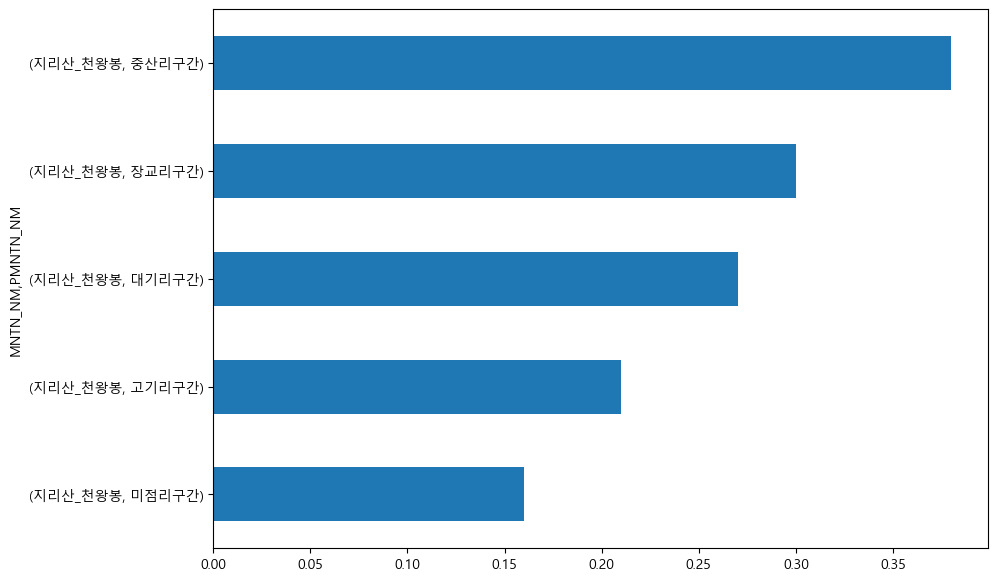

In [153]:
test = df[df['MNTN_NM'].str.startswith('지리산')].groupby(['MNTN_NM','PMNTN_NM'])['PMNTN_LT'].max().sort_values(ascending=True).head(5)
plt.figure(figsize=(10,7))
test.plot.barh()
plt.show()

In [168]:
# 커럼이름 변경
df = df.rename(columns={'MNTN_NM':'산이름','PMNTN_NM':'등산로명','PMNTN_MAIN':'주요지점'})
df

,PMNTN_SN,MNTN_CODE,산이름,등산로명,주요지점,PMNTN_LT,PMNTN_DFFL,PMNTN_UPPL,PMNTN_GODN,PMNTN_MTRQ,PMNTN_CNRL,PMNTN_CLS_,PMNTN_RISK,PMNTN_RECO
0,32553,428203804,소똥령,진부리구간,N,2.53,쉬움,45,31,N,N,N,N,M
1,16474,428203704,머네골1구간,장신리구간,N,2.78,쉬움,49,34,N,N,Y,N,M
2,1955,428200301,건봉산,광산리구간,N,6.18,쉬움,109,76,N,N,Y,N,M
3,47554,428204404,진부령,진부리구간,N,3.31,쉬움,58,41,N,N,N,N,M
4,36422,428203904,안흘리길,장신리구간,N,10.31,쉬움,221,155,N,N,N,N,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57442,3869,422300501,고성산,오분동구간,N,0.08,쉬움,1,1,N,N,N,N,M
57445,3872,422300501,고성산,오분동구간,N,0.21,쉬움,4,3,N,N,N,N,M
57446,974,422300104,갈야산,마달동구간,N,1.03,쉬움,18,13,N,N,N,N,M
57447,840,422300201,간대산,신기리구간,N,3.09,쉬움,55,38,N,N,N,N,M


In [163]:
 df_max_time = df[ df['PMNTN_UPPL'] ==  df['PMNTN_UPPL'].max()]
 df_max_time[['MNTN_NM','PMNTN_NM','PMNTN_LT','PMNTN_DFFL','PMNTN_UPPL','PMNTN_GODN']]

,MNTN_NM,PMNTN_NM,PMNTN_LT,PMNTN_DFFL,PMNTN_UPPL,PMNTN_GODN
7,백두대간트레일인제,광원리구간,117.93,쉬움,2081,1457


In [ ]:
test = df.groupby(['MNTN_NM','PMNTN_NM'])['PMNTN_LT'].max().sort_values(ascending=True).head(5)
plt.figure(figsize=(10,7))
test.plot.barh()
plt.show()